등장할 확률이 일정한 m개의 문자 중에 하나의 문자를 뽑는 trial을 두 명의 player가 할 때, length n의 case가 다른 length n의 case에 대하여 이길 확룰을 연산하는 모델

Commit Title: Homework #2 - 등장할 확률이 일정한 m개의 문자 중에 하나의 문자를 뽑는 trial을 두 명의 player가 할 때, length n의 case가 다른 length n의 case에 대하여 이길 확룰을 연산하는 모델 - 1

In [5]:
import numpy as np
import pandas as pd
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.style as style
from tqdm import tqdm
# import seaborn as sns

Players: 2

Characters:         m

Checking Length:    n

In [6]:
def index_win_ratio(a, b, m, n):
    N = 100_000

    result = {"first": 0, "second": 0}

    for i in range(N):
        # while loop for each heads and tails case
        flips = np.zeros(n)
        while True:
            for j in range(1, n):
                flips[j - 1] = flips[j]

            number = random.randint(1, m)
            
            flips[n - 1] = number
        
            if (flips == a).all():
                result["first"] += 1
                break
            if (flips == b).all():
                result["second"] += 1
                break

    return result["first"] / (result["first"] + result["second"]) # result["first"] / N

In [7]:
def make_arrays(m, n):
    if n == 1:
        arr = []

        for i in range(1, m + 1):
            arr.append(np.array([i]))

        return arr
    
    arrays = []
    for i in range(1, m + 1):
        for array in make_arrays(m, n - 1):
            arrays.append(np.append(array, i))

    return arrays

In [8]:
n = 2 # length of case
m = 6 # number of characters
arr = make_arrays(m, n)

indexes = []

for i in arr:
    indexes.append(np.array2string(i))

dataframe = pd.DataFrame(index = indexes, columns = indexes)

for a in tqdm(arr):
    for b in tqdm(arr):
        dataframe.loc[np.array2string(a), np.array2string(b)] = index_win_ratio(a, b, m, n)

dataframe

100%|██████████| 27/27 [1:16:36<00:00, 170.25s/it]

         [1 1 1]  [2 1 1]  [3 1 1]  [1 2 1]  [2 2 1]  [3 2 1]  [1 3 1]  \
[1 1 1]      1.0   0.2781  0.28021  0.43076  0.38385  0.37916  0.42371   
[2 1 1]  0.72215      1.0  0.50066  0.46592  0.40031  0.40212  0.55214   
[3 1 1]  0.72384  0.49821      1.0   0.5547  0.50039  0.50288  0.46541   
[1 2 1]   0.5697   0.5332  0.44353      1.0  0.44384  0.44595  0.50316   
[2 2 1]  0.61985  0.60256  0.49909   0.5547      1.0  0.49938  0.55567   
[3 2 1]  0.62163  0.59855  0.50253  0.55458  0.50369      1.0  0.55383   
[1 3 1]  0.57186  0.44634  0.53461  0.49687  0.44506  0.44598      1.0   
[2 3 1]   0.6211  0.50012  0.59759  0.55781   0.5016   0.4989  0.55493   
[3 3 1]  0.62226  0.49723  0.59924  0.55408  0.50163  0.50041  0.55659   
[1 1 2]  0.50036  0.38544  0.35306  0.60097  0.49904  0.47088  0.50195   
[2 1 2]  0.56441  0.49882  0.47357  0.50181  0.39829  0.37546  0.49637   
[3 1 2]  0.59143  0.52631  0.50288  0.62504  0.52876  0.50024  0.43897   
[1 2 2]  0.57177  0.50224  0.47074  0.

In [9]:
for i in indexes:
    for j in indexes:
        print("[ " + i + ", " + j + " ]: " + str(dataframe.loc[i, j]))
    print("\n")

[ [1 1 1], [1 1 1] ]: 1.0
[ [1 1 1], [2 1 1] ]: 0.2781
[ [1 1 1], [3 1 1] ]: 0.28021
[ [1 1 1], [1 2 1] ]: 0.43076
[ [1 1 1], [2 2 1] ]: 0.38385
[ [1 1 1], [3 2 1] ]: 0.37916
[ [1 1 1], [1 3 1] ]: 0.42371
[ [1 1 1], [2 3 1] ]: 0.38078
[ [1 1 1], [3 3 1] ]: 0.38321
[ [1 1 1], [1 1 2] ]: 0.50158
[ [1 1 1], [2 1 2] ]: 0.43493
[ [1 1 1], [3 1 2] ]: 0.40811
[ [1 1 1], [1 2 2] ]: 0.43234
[ [1 1 1], [2 2 2] ]: 0.50176
[ [1 1 1], [3 2 2] ]: 0.40748
[ [1 1 1], [1 3 2] ]: 0.42602
[ [1 1 1], [2 3 2] ]: 0.43434
[ [1 1 1], [3 3 2] ]: 0.40991
[ [1 1 1], [1 1 3] ]: 0.49961
[ [1 1 1], [2 1 3] ]: 0.40932
[ [1 1 1], [3 1 3] ]: 0.43691
[ [1 1 1], [1 2 3] ]: 0.43034
[ [1 1 1], [2 2 3] ]: 0.40854
[ [1 1 1], [3 2 3] ]: 0.43509
[ [1 1 1], [1 3 3] ]: 0.42885
[ [1 1 1], [2 3 3] ]: 0.41065
[ [1 1 1], [3 3 3] ]: 0.49976


[ [2 1 1], [1 1 1] ]: 0.72215
[ [2 1 1], [2 1 1] ]: 1.0
[ [2 1 1], [3 1 1] ]: 0.50066
[ [2 1 1], [1 2 1] ]: 0.46592
[ [2 1 1], [2 2 1] ]: 0.40031
[ [2 1 1], [3 2 1] ]: 0.40212
[ [2 1 1], [1 3 1

In [10]:
results = []

for i in range(0, len(indexes) - 1):
    for j in range(i + 1, len(indexes)):
        results.append((dataframe.loc[indexes[i], indexes[j]] + dataframe.loc[indexes[j], indexes[i]]))

print(statistics.mean(results))

1.0000324786324786


<Figure size 640x480 with 0 Axes>

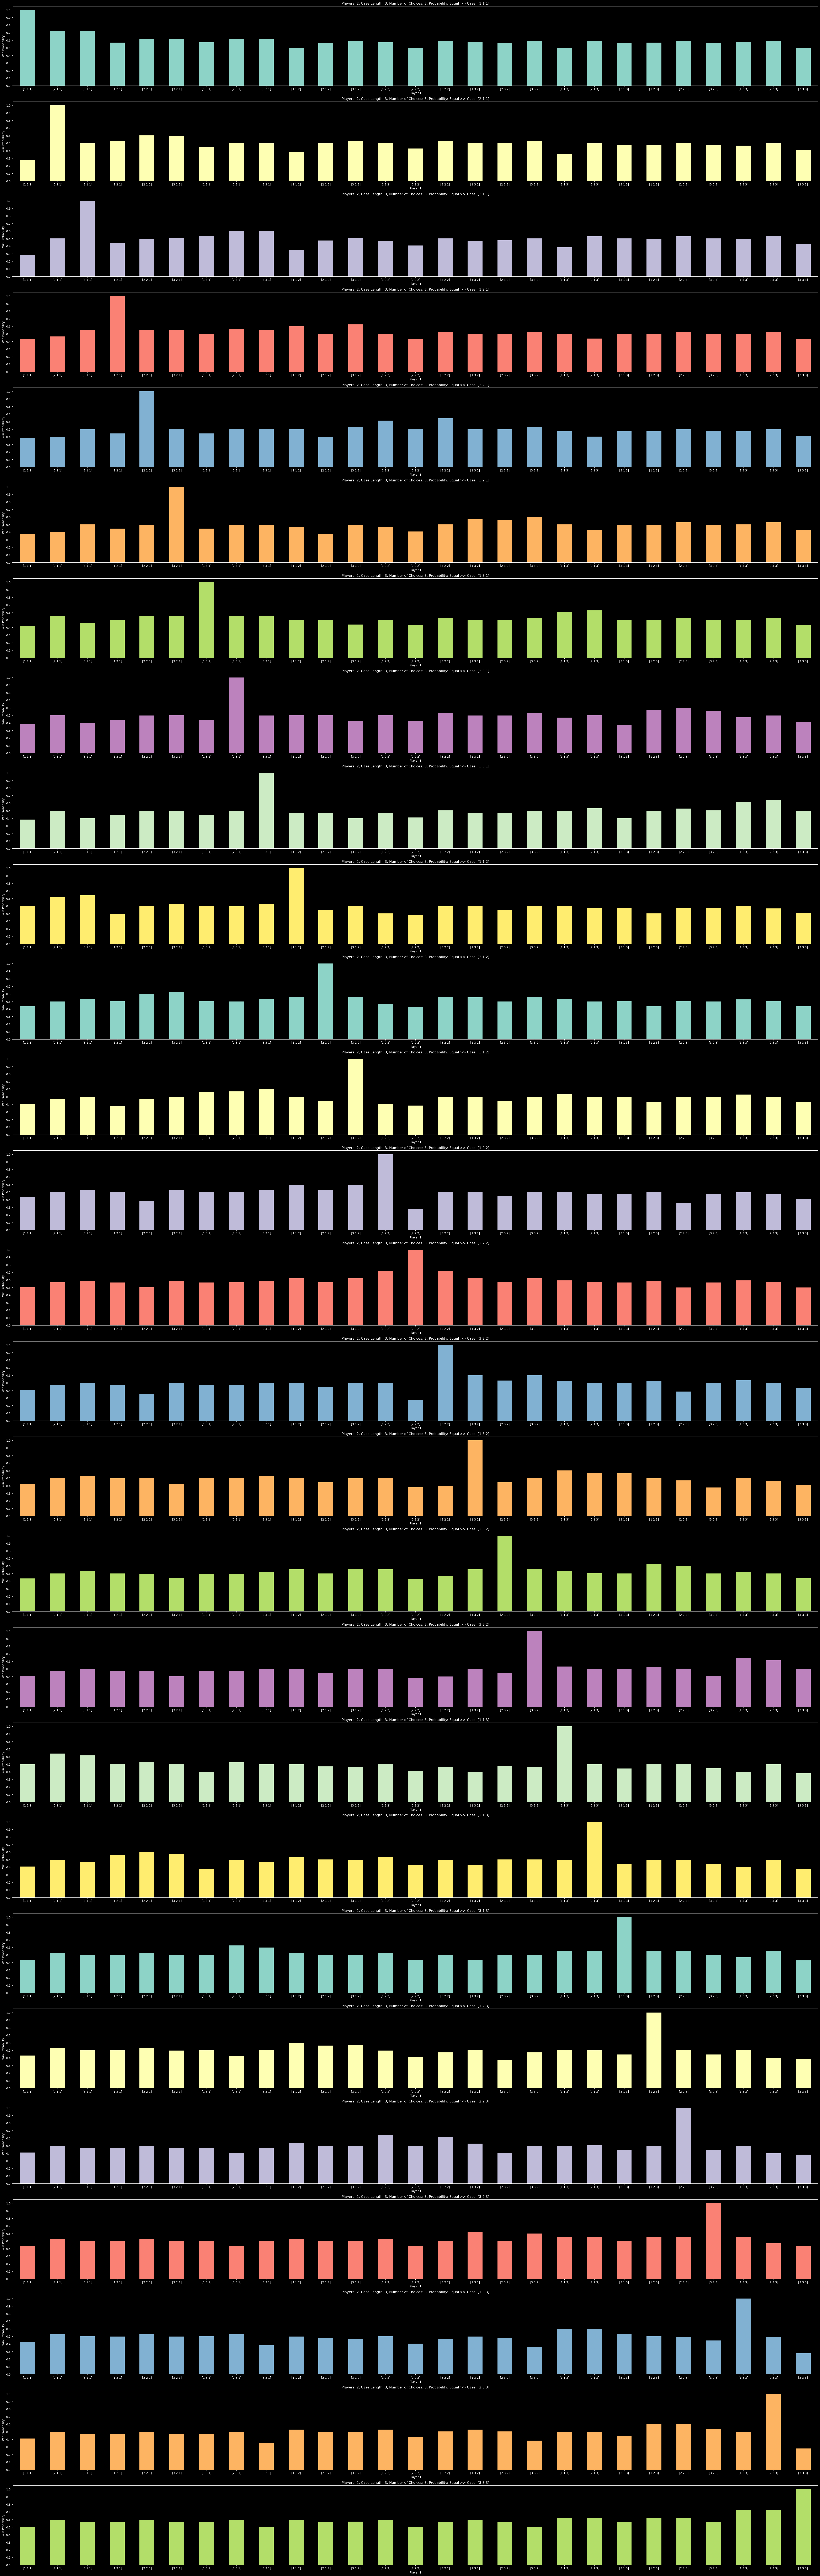

In [11]:
plt.figure()
style.use('dark_background')
# sns.set_style("dark")

titleList = []

for i in range(len(indexes)):
    titleList.append("Players: 2, Case Length: " + str(n) + ", Number of Choices: "+ str(m) + ", Probability: Equal >> Case: " + indexes[i])

plots = dataframe.plot(kind='bar', figsize=(50, 160), subplots = True, title = titleList, legend = False, xlabel = "Player 1", ylabel = "Win Probability", sharex = False, yticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], rot = 0)
# , title = titleList, figsize=(20, 50), layout = (int(len(indexes) / 2), 2)

# plt.suptitle("Players: 2, Case Length: 3, Number of Choices: 2, Probability: Equal")
plt.xlabel(xlabel = "Player 1")
plt.xticks(rotation = 0)
plt.ylabel("Win Probability")
plt.rcParams['font.size'] = 36
# plt.legend(bbox_to_anchor = (1.0, 1.0), loc = "upper left")

plt.show()